In [2]:
from google.colab import files
uploaded = files.upload()


Saving college_admissions.csv to college_admissions (1).csv


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#  Step 1: Data Collection
df = pd.read_csv("college_admissions.csv")  # Load dataset

In [15]:
#  Step 2: Data Preprocessing
df.dropna(inplace=True)  # Remove rows with missing values

In [16]:
# Encode target variable (Pass/Fail to 1/0)
le = LabelEncoder()
df["Final Result"] = le.fit_transform(df["Final Result"])  # Pass=1, Fail=0


In [17]:
#  Step 3: Feature Selection
X = df.drop("Final Result", axis=1)  # Features
y = df["Final Result"]

In [18]:
#  Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [20]:
#  Step 6: Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)  # Train model

LogisticRegression(max_iter=1000)


 Accuracy: 0.90

 Classification Report:

              precision    recall  f1-score   support

        Fail       0.86      0.86      0.86         7
        Pass       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



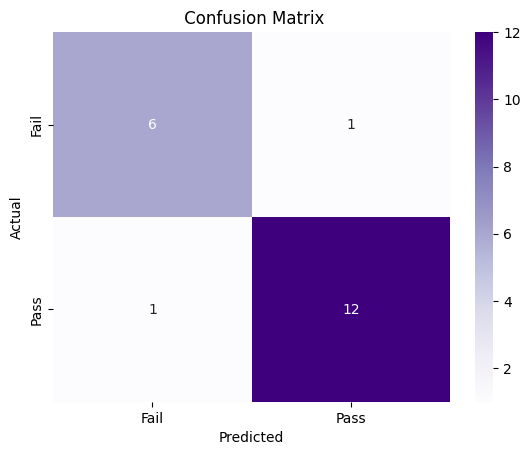

In [21]:
#  Step 7: Prediction
# -----------------------------
y_pred = model.predict(X_test)  # Make predictions
#  Step 8: Model Evaluation
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {accuracy:.2f}\n")

print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()